# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [121]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [122]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [127]:
def svd_validation(A):
    m,n = A.shape                  
    min_dimension = min(m,n)       
    u, s, vh = svd(A)             
    sigma = matriz_sigma(s,m,n)     #Llamamos a una función que se creo para obtener la matriz Sigma.               
    suma = 0
    for k in range(min_dimension):
        suma = suma  + (sigma[k,k] * (u[:,k].reshape(m,1) @ vh[k,:].reshape(1,n)))
    return np.allclose(A, suma)

In [128]:
#Función para crear la matriz sigma con m filas y n columnas, donde en su diagonal estan los valores de s.
def matriz_sigma(s,m,n):
    sigma = np.zeros((m,n))
    minimo= min(m,n)
    for k in range(minimo):
        sigma[k,k] = s[k]
    return sigma

In [129]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

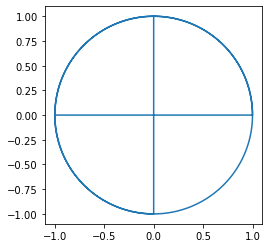

In [132]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [141]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


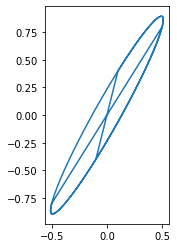

In [134]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [149]:
m,n = A.shape
u,s,vh = svd(A)
sigma = matriz_sigma(s,m,n)

u.dot(sigma.dot(vh))

array([[0.1, 0.5],
       [0.4, 0.8]])

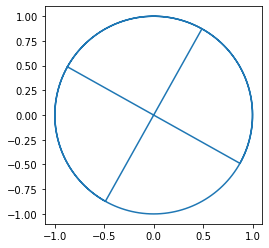

In [150]:
show_circle(u @ circle)

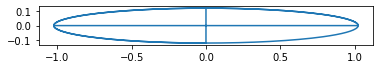

In [153]:
show_circle(sigma @ circle)

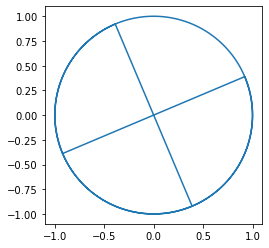

In [154]:
show_circle(vh @ circle)

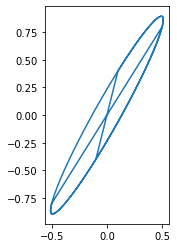

In [160]:
show_circle( (u @ sigma @ vh) @ circle)

__Respuesta:__ Cuando aplicamos los operadores lineales $U$ y $V^H$, notamos que la transmormación de la circunferencia unitaria se resume en una rotación en torno al centro. Si estas no fueran unitarias, tendriamos que las distancias cambiaran de tamaño provocando un achatamiento, compresión o estiramiento de la figura. Cuando aplicamos el operador lineal $\Sigma$, notamos que la circunferencia se comprime en el eje y. 

__Respuesta:__ Como podemos apreciar en el desarrollo anterior es posible descomponer la transformación realizada por el operador lineal $A$ a la circunferencia unitaria. Es decir, es equivalente aplicar el operador lineal $A$, que aplicar los operadores $V^H, \Sigma, U$ (en ese orden) a la circunferencia unitaria. Al analizar la transformación mediante la descomposición SVD de A podemos extraer más información respecto al estado final de la circunferencia unitaria.

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [161]:
from pathlib import Path
from PIL import Image

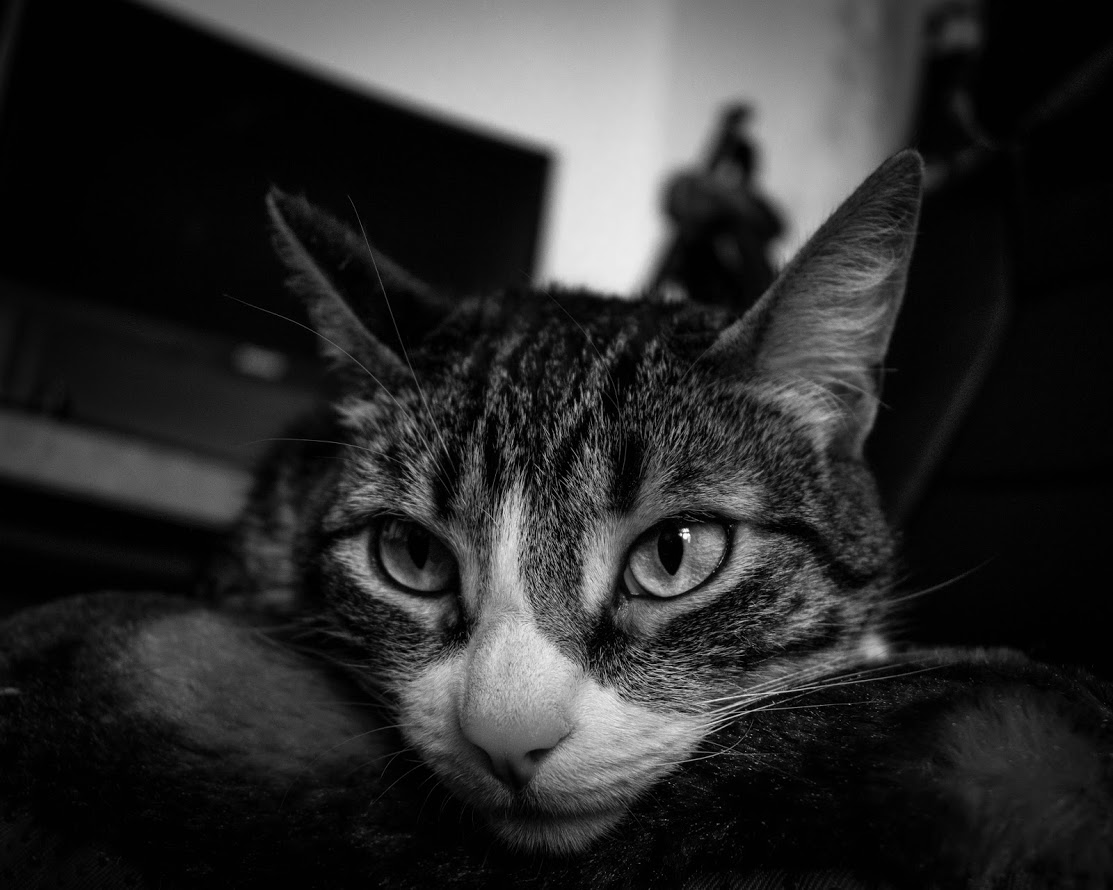

In [162]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [163]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [172]:
def low_rank_svd_approximation(A, l):
    m,n = A.shape                        
    u, s, vh = svd(A)              
    sigma = matriz_sigma(s,m,n)  
    aproximacion = 0
    for k in range(l):
        aproximacion = aproximacion  + (sigma[k,k] * (u[:,k].reshape(m,1) @ vh[k,:].reshape(1,n))) 
    error = (np.linalg.norm(abs(A-aproximacion)) / np.linalg.norm(abs(A)))*100
    print(f'El error de aproximacion utilizando la norma de Frobenius es del {error}%.')
    return aproximacion    

El error de aproximacion utilizando la norma de Frobenius es del 22.110857274039766%.


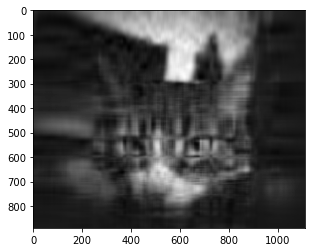

In [173]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

El error de aproximacion utilizando la norma de Frobenius es del 11.222788733399371%.


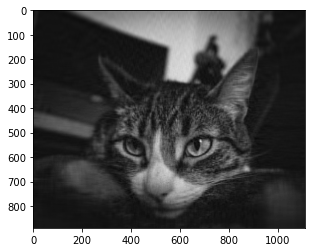

In [22]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [175]:
def low_rank_svd_tol_approximation(A, tol): 
    m,n = A.shape 
    u, s, vh = svd(A)    
    l = np.linalg.matrix_rank(A)
    numerador = 0
    denominador = 0
    for k in range(l):
        denominador = denominador + s[k]**2
    denominador = denominador**0.5
    suma = numerador/denominador
    while suma <= tol:
        l = l - 1
        numerador = numerador + s[l]**2    
        suma = (numerador**0.5)/denominador   
    l = l+1  #Se le vuelve a sumar 1 al valor de l, dado que en la ultima iteracion del ciclo While sumamos aquel valor que provoca que estemos por arriba de la tolerancia.
    print(f'El mayor rango aproximado de A tal que el error de aproximación sea a lo más {tol*100}%  es : {l}.')
    return low_rank_svd_approximation(A, l) #Como ya encontramos l tal que se cumpla lo pedido, llamamos a la funcion defininada en el ejercicio anterior.

El mayor rango aproximado de A tal que el error de aproximación sea a lo más 10.0%  es : 64.
El error de aproximacion utilizando la norma de Frobenius es del 9.937010770391481%.


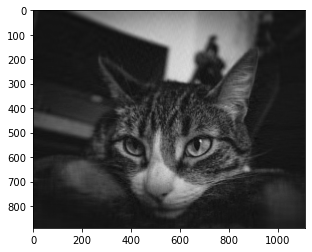

In [176]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

El mayor rango aproximado de A tal que el error de aproximación sea a lo más 1.0%  es : 457.
El error de aproximacion utilizando la norma de Frobenius es del 0.994454049402313%.


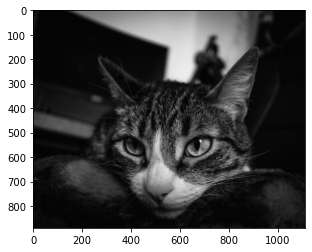

In [177]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

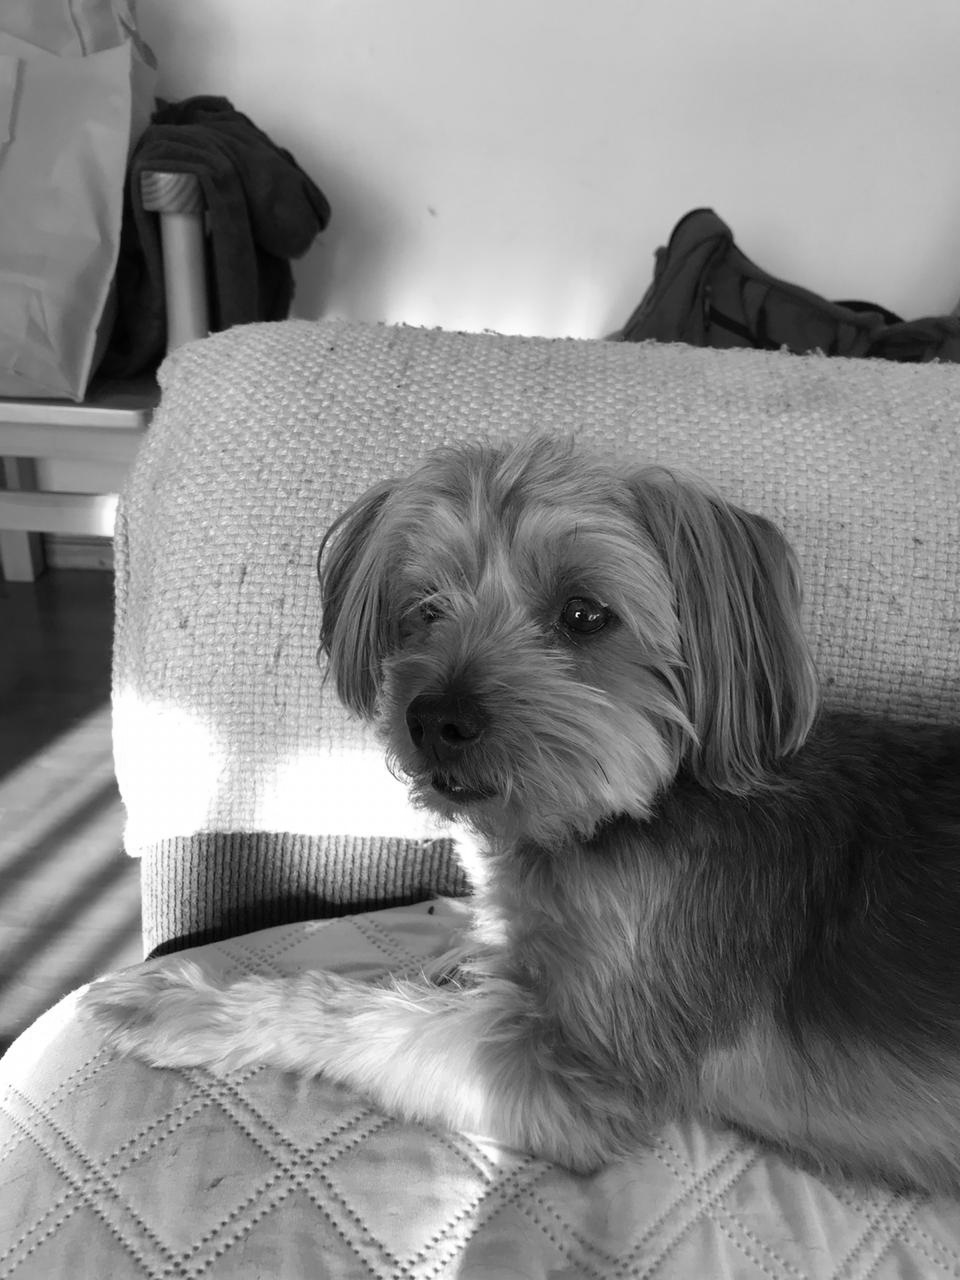

In [26]:
your_img_name = 'Teo' #Teo se llama mi perro.
dog = Image.open(Path().resolve().parent / "images" / 'Teo.jpeg' ).convert('L')
dog

In [178]:
dog_np = np.array(dog)
print(dog_np.shape)

(1280, 960)


El error de aproximacion utilizando la norma de Frobenius es del 11.324368054164038%.


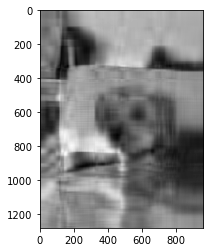

In [179]:
dog10 = low_rank_svd_approximation(dog_np, l=10)
plt.imshow(dog10, cmap='gray');

El error de aproximacion utilizando la norma de Frobenius es del 5.651937470053405%.


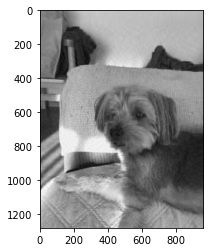

In [180]:
dog50 = low_rank_svd_approximation(dog_np, l=50)
plt.imshow(dog50, cmap='gray');

El mayor rango aproximado de A tal que el error de aproximación sea a lo más 10.0%  es : 14.
El error de aproximacion utilizando la norma de Frobenius es del 9.680966216311296%.


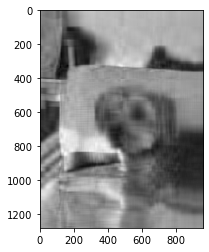

In [181]:
dog_e1 = low_rank_svd_tol_approximation(dog_np, tol=1.e-1)
plt.imshow(dog_e1, cmap='gray');

El mayor rango aproximado de A tal que el error de aproximación sea a lo más 1.0%  es : 355.
El error de aproximacion utilizando la norma de Frobenius es del 0.9954032326702087%.


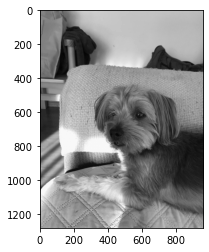

In [31]:
dog_e2 = low_rank_svd_tol_approximation(dog_np, tol=1.e-2)
plt.imshow(dog_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ A mi parecer no es la mejor forma de comprimir imágenes, porque se pierde información. Haciendo una busqueda rapida por internet podemos encontrar distintos metodos de compresión de imagenes sin perdida de información, como por ejemplo "Delta encoding", "Run-length encoding" o "Codificación entrópica". 

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [182]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [207]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [208]:
#No consideres registros que tengan código de comuna nulo. 
#Primero obtengo todos los indices que contengan al codigo comuna como nulo, y luego elimino las filas con estos indices.
covid_comunas.drop(covid_comunas[covid_comunas.codigo_comuna.isnull()].index,inplace = True) 

#Rellena todos los registros de casos totales nulos por cero.
lista_fechas = covid_comunas.iloc[:,5:-1].columns 
covid_comunas= pd.concat([covid_comunas.iloc[:,0:5], covid_comunas[lista_fechas].fillna(0)], axis=1)


#Considera utilizar melt u otro método similar para apilar las columnas de fechas particulares en solo dos columnas,
#fecha y casos_totales.
covid_comunas = pd.melt(
    covid_comunas,
    id_vars= ['region','comuna','poblacion'],
    value_vars= lista_fechas,
    var_name = 'fecha',
    value_name = 'casos_totales'
)

#Define la columna casos_nuevos como la diferencia entre dos registros consecutivos para una misma comuna
    #No olvides ordenar por fecha.
    #El primer registro de cada comuna debe ser nulo.
    #Considera utilizar el método transform.
covid_comunas.sort_values('fecha',ascending = True)    
covid_comunas = covid_comunas.assign(
    casos_nuevos=lambda df: df.groupby("comuna")["casos_totales"].transform(lambda s: s.diff().fillna(0))) 

#Filtra por el umbral de tiempo dado
covid_comunas['fecha'] = pd.to_datetime(covid_comunas['fecha'], format='%Y-%m-%d')
start_date = pd.to_datetime('2020-10-01', format = '%Y-%m-%d')
end_date = pd.to_datetime('2020-10-11', format = '%Y-%m-%d') 
mask = (covid_comunas['fecha'] >= start_date) & (covid_comunas['fecha'] <= end_date)
covid_comunas = covid_comunas.loc[mask]

#Agrupa por región-comuna y luego define la columna promedio_casos_nuevos como el promedio de la columna casos_nuevos
covid_comunas = covid_comunas.assign(
    promedio_casos_nuevos = lambda df: df.groupby(['region','comuna'])['casos_nuevos'].transform(lambda s: s.mean()))
   
#Asigna la columna tasa_promedio_casos_nuevos como la cantidad promedio de casos nuevos por cada cien mil habitantes.
covid_comunas['tasa_promedio_casos_nuevos'] = (covid_comunas['promedio_casos_nuevos'])/(covid_comunas['poblacion']) * 100000 

In [210]:
#Utiliza el dataframe covid_comunas para obtener el dataframe covid_tasa_promedio_nuevos
#que posee las columnas region, comuna, promedio_casos_nuevos, poblacion y tasa_promedio_casos_nuevos 
#considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

covid_tasa_promedio_nuevos = covid_comunas.drop(['fecha','casos_totales','casos_nuevos'], axis=1).drop_duplicates()

#Se utiliza la funcion drop_duplicates() porque de no ser asi, tendremos varias filas con valores duplicados correspondiente
#a las diferentes fechas, las cuales fueron elminadas del dataframe.

In [36]:
#Ordena el dataframe resultante por tasa_promedio_casos_nuevos de manera descendente.
covid_tasa_promedio_nuevos = covid_tasa_promedio_nuevos.sort_values('tasa_promedio_casos_nuevos',ascending = False)

In [209]:
covid_tasa_promedio_nuevos.head()

,region,comuna,poblacion,promedio_casos_nuevos,tasa_promedio_casos_nuevos
19374,Magallanes,Timaukel,282.0,3.333333,1182.033097
19373,Magallanes,San Gregorio,681.0,4.000000,587.371512
19367,Magallanes,Laguna Blanca,264.0,1.333333,505.050505
19369,Magallanes,Porvenir,7323.0,34.333333,468.842460
19371,Magallanes,Punta Arenas,141984.0,631.333333,444.651040


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Respecto a las comunas que tienen mayor tasa promedio de casos nuevos se puede observar que todas pertenecen a la región de Magallanes y tienen una baja población. A pesar de que el promedio de casos nuevos es bajo, en realidad es bastante si consideramos que la poblaión es muy reducida (en pocos dias puede haber un gran porcentaje de casos nuevos).
Como la población es pequeña, es de esperarse que la tasa promedio de casos nuevos sea alta, dado que es más facil que toda la poblacion se relacione diariamente. Gracias a estos datos podemos confirmar que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. 

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [211]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,728,794,738,737,832,542,343,706,777,1058
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,648,972,932,1046,1044,796,714,694,946,1752
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1229,1571,1890,2239,3825,1749,1354,1858,1238,1906
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,319,792,838,1020,939,563,340,237,838,863
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,823,1008,1128,1057,1026,473,1503,1050,1125,1351


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [212]:
dt_fechas = covid_pcr.iloc[:,3:]
covid_pcr_melt = pd.melt(
    covid_pcr,
    id_vars = 'region',
    value_vars = dt_fechas,
    var_name = 'fecha',
    value_name = 'nm_pcr'
) 

covid_pcr_melt['fecha'] = pd.to_datetime(covid_pcr_melt['fecha'], format = '%Y-%m-%d')
covid_pcr_melt['nm_pcr'].fillna(0, inplace = True)


Obtén el dataframe `covid_casos_melt` utilizando `covid_casos` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [214]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [215]:
dt_fechas = covid_comunas.iloc[:,5:-1]
covid_casos_melt = pd.melt(
    covid_comunas,
    id_vars = 'region',
    value_vars = dt_fechas,
    var_name = 'fecha',
    value_name = 'casos_totales'
)

covid_casos_melt['casos_totales'].fillna(0,inplace = True)
covid_casos_melt['fecha'] = pd.to_datetime(covid_casos_melt['fecha'], format = '%Y-%m-%d')

covid_casos_melt = covid_casos_melt.groupby(['region', 'fecha']).sum().reset_index()

Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [42]:
covid_corr_casos_pcr = pd.merge(covid_pcr_melt, covid_casos_melt, how='right', on = ['region', 'fecha'])
covid_corr_casos_pcr['nm_pcr'].fillna(0, inplace = True)
covid_corr_casos_pcr['casos_totales'].ffill(inplace = True)

copia = covid_corr_casos_pcr

covid_corr_casos_pcr = covid_corr_casos_pcr.groupby('region').corr(method = 'pearson')
covid_corr_casos_pcr = covid_corr_casos_pcr.iloc[::2,].drop('nm_pcr', axis=1).sort_values('casos_totales', ascending = True)
covid_corr_casos_pcr.head()

,,casos_totales
region,,
Metropolitana,nm_pcr,0.676096
Magallanes,nm_pcr,0.778014
Antofagasta,nm_pcr,0.781364
Aysén,nm_pcr,0.811034
Atacama,nm_pcr,0.830535


In [43]:
import matplotlib.pyplot as plt

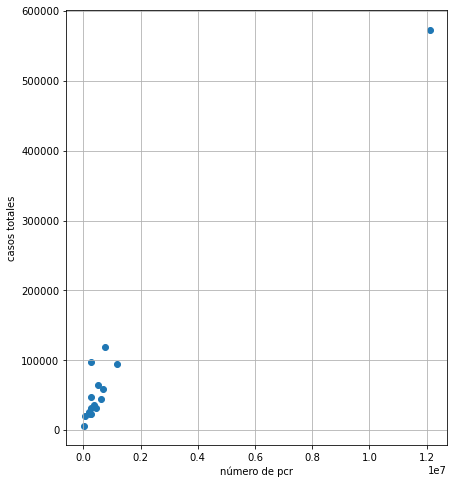

In [226]:
copia = copia.groupby('region').sum()

fig = plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.scatter (copia['casos_totales'], copia['nm_pcr'])
plt.xlabel('número de pcr')
plt.ylabel('casos totales')
plt.grid()

#plt.subplot(1, 2, 2)
#plt.plot(copia['casos_totales'],copia['nm_pcr'], marker = 'o')
#plt.xlabel('número de pcr')
#plt.ylabel('casos totales')
#plt.grid()

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ Utilizando el último dataframe obtenido y apoyandonos del gráfico adjuntado, podemos concluir que si hay una correlación entre el número de exámenes pcr y los casos confirmados por comuna. Nuestro sentido común nos dice que esto es cierto. Tiene mucho sentido que el número de examenes realizados tenga relación con los casos confirmados (para confirmar que la persona tiene covid-19 es necesario realizar el examen y ver el resultado).

#### Ejercicio 8

(10 puntos)

Durante el transcurso de los años muchas personas mueren por diferentes motivos (incendios, accidentes automovilísticos, sobredosis, vejes, etc). Este año se suma la presencia del Covid-19, que ha provocado innumerables decesos, es por esto que se han tomado diversas medidas para prevenir el contagio en la población, entre ellas encontramos el distanciamiento social, cuarentenas, aplicación de test pcr, etc.

__Pregunta:__ Teniendo en cuanta todas estas medidas sanitarias y las cuarentenas activas en las distintas regiones del país, ¿se esperaria que durante el mes de septiembre hayan aumentado las muertes en comparación al mismo mes de los últimos 5 años?

In [229]:
#Los datos aquí publicados provienen de registros administrativos correspondientes a los trámites de defunción desde el año 2010.

defunciones_2010_2020 = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto32/Defunciones.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
defunciones_2010_2020.head()

,region,codigo_region,comuna,codigo_comuna,2010-01-01,2010-01-02,2010-01-03,2010-01-04,2010-01-05,2010-01-06,...,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29
0,Antofagasta,2,Antofagasta,2101,0,6,1,8,0,5,...,6,5,8,8,4,0,14,3,8,8
1,Antofagasta,2,Calama,2201,0,0,0,6,3,4,...,2,1,3,4,0,0,7,2,2,0
2,Antofagasta,2,María Elena,2302,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Antofagasta,2,Mejillones,2102,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Antofagasta,2,Ollagüe,2202,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Utilizando el Dataframe defunciones_2010_2020 se obtendrá la cantidad de fallecidos durante el mes de septiembre de cada año.

In [230]:
dt_fechas = defunciones_2010_2020.iloc[:,4:]
defunciones_melt = pd.melt(
    defunciones_2010_2020,
    id_vars = 'region',
    value_vars = dt_fechas,
    var_name = 'fecha',
    value_name = 'defunciones'
)

defunciones_melt['defunciones'].fillna(0,inplace = True)
defunciones_melt['fecha'] = pd.to_datetime(defunciones_melt['fecha'], format = '%Y-%m-%d')

#Filtrar umbral de fecha septiempbre 2015
start_date2015 = pd.to_datetime('2015-09-01', format = '%Y-%m-%d')
end_date2015 = pd.to_datetime('2015-09-30', format = '%Y-%m-%d') 
mask2015 = (defunciones_melt['fecha'] >=start_date2015) & (defunciones_melt['fecha'] <= end_date2015)
defunciones_2015 = defunciones_melt.loc[mask2015]
suma2015 = defunciones_2015['defunciones'].sum()

#Filtrar umbral de fecha septiempbre 2016
start_date2016 = pd.to_datetime('2016-09-01', format = '%Y-%m-%d')
end_date2016 = pd.to_datetime('2016-09-30', format = '%Y-%m-%d') 
mask2016 = (defunciones_melt['fecha'] >=start_date2016) & (defunciones_melt['fecha'] <= end_date2016)
defunciones_2016 = defunciones_melt.loc[mask2016]
suma2016 = defunciones_2016['defunciones'].sum()

#Filtrar umbral de fecha septiempbre 2017
start_date2017 = pd.to_datetime('2017-09-01', format = '%Y-%m-%d')
end_date2017 = pd.to_datetime('2017-09-30', format = '%Y-%m-%d') 
mask2017 = (defunciones_melt['fecha'] >=start_date2017) & (defunciones_melt['fecha'] <= end_date2017)
defunciones_2017 = defunciones_melt.loc[mask2017]
suma2017 = defunciones_2017['defunciones'].sum()

#Filtrar umbral de fecha septiempbre 2018
start_date2018 = pd.to_datetime('2018-09-01', format = '%Y-%m-%d')
end_date2018 = pd.to_datetime('2018-09-30', format = '%Y-%m-%d') 
mask2018 = (defunciones_melt['fecha'] >=start_date2018) & (defunciones_melt['fecha'] <= end_date2018)
defunciones_2018 = defunciones_melt.loc[mask2018]
suma2018 = defunciones_2018['defunciones'].sum()

#Filtrar umbral de fecha septiempbre 2019
start_date2019 = pd.to_datetime('2019-09-01', format = '%Y-%m-%d')
end_date2019 = pd.to_datetime('2019-09-30', format = '%Y-%m-%d') 
mask2019 = (defunciones_melt['fecha'] >=start_date2019) & (defunciones_melt['fecha'] <= end_date2019)
defunciones_2019 = defunciones_melt.loc[mask2019]
suma2019 = defunciones_2019['defunciones'].sum()

#Filtrar umbral de fecha septiempbre 2020
start_date2020 = pd.to_datetime('2020-09-01', format = '%Y-%m-%d')
end_date2020 = pd.to_datetime('2020-09-30', format = '%Y-%m-%d') 
mask2020 = (defunciones_melt['fecha'] >=start_date2020) & (defunciones_melt['fecha'] <= end_date2020)
defunciones_2020 = defunciones_melt.loc[mask2020]
suma2020 = defunciones_2020['defunciones'].sum()

#Promedio de fallecimiento durante los últimos 5 años.
suma_promedio = (suma2015 + suma2016 + suma2017 + suma2018 + suma2019)/5


In [231]:
#Dataframe que da cuenta del número de personas con diagnóstico COVID-19 fallecidas por día, según región de residencia.
covid_2020 = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_2020.head()

,region,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,Arica y Parinacota,0,0,0,0,0,0,0,0,0,...,174,175,175,176,176,176,176,179,179,183
1,Tarapacá,0,0,0,0,0,0,0,0,0,...,240,240,241,242,242,242,242,243,243,244
2,Antofagasta,0,0,0,0,0,0,0,0,0,...,522,524,525,528,530,530,530,533,534,537
3,Atacama,0,0,0,0,0,0,0,0,0,...,83,84,84,84,84,84,84,84,86,87
4,Coquimbo,0,0,0,0,0,0,0,0,0,...,238,238,239,239,240,240,240,242,242,246


Utilizando el Dataframe covid_2020 se encontrará la cantidad de fallecidos por COVID-19 solo en el mes de septiembre.

In [248]:
dt_fechas = covid_2020.iloc[:,1:]
covid_melt = pd.melt(
    covid_2020,
    id_vars = 'region',
    value_vars = dt_fechas,
    var_name = 'fecha',
    value_name = 'defunciones'
)

covid_melt['defunciones'].fillna(0,inplace = True)
covid_melt['fecha'] = pd.to_datetime(covid_melt['fecha'], format = '%Y-%m-%d')

#Filtrar umbral de fecha septiempbre 2020
start_date = pd.to_datetime('2020-09-01', format = '%Y-%m-%d')
end_date = pd.to_datetime('2020-09-30', format = '%Y-%m-%d')

mask_inicial = covid_melt['fecha'] == start_date
mask_final = covid_melt['fecha'] == end_date

defunciones = abs(covid_melt.loc[mask_inicial]['defunciones'].sum() - covid_melt.loc[mask_final]['defunciones'].sum())

covid_melt.head()

,region,fecha,defunciones
0,Arica y Parinacota,2020-03-22,0.0
1,Tarapacá,2020-03-22,0.0
2,Antofagasta,2020-03-22,0.0
3,Atacama,2020-03-22,0.0
4,Coquimbo,2020-03-22,0.0


In [233]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

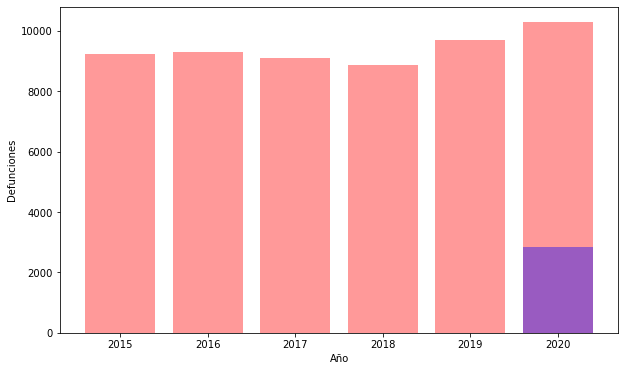

In [245]:
fig = plt.figure(figsize=(10,6))
x = ('2015', '2016', '2017', '2018', '2019', '2020')
y = (suma2015, suma2016, suma2017, suma2018, suma2019, suma2020)
plt.bar(x, y, color="r", alpha = 0.4) + plt.bar(x, [0,0,0,0,0, defunciones], color = 'b', alpha = 0.4)
plt.xlabel('Año')
plt.ylabel('Defunciones');


El color rosa hace referencia a las defunciones por causa génerica, mientras que en color morado las defunciones por covid.

In [236]:
print(f'El promedio de fallecimientos entre el 2015 y el 2019 en el mes de septiembre es: {suma_promedio}.')
print(f'Durante el mes de septiembre del 2020 fallecieron {suma2020} personas de las cuales {defunciones} corresponden a muertes por COVID-19,\npor lo tanto en septiembre de este año hubieron {suma2020 - defunciones} personas fallecidas por causas similares a los años anteriores.')

El promedio de fallecimientos entre el 2015 y el 2019 en el mes de septiembre es: 9230.2.
Durante el mes de septiembre del 2020 fallecieron 10282 personas de las cuales 2840.0 corresponden a muertes por COVID-19,
por lo tanto en septiembre de este año hubieron 7442.0 personas fallecidas por causas similares a los años anteriores.


__Respuesta:__ Gracias a los datos adquiridos podemos notar un claro aumento de fallecimientos durante el mes de septiembre. A pesar de que las muertes por Covid-19 fueron de 2840 personas (en el gráfico de barra esta representado por la barra morada), solo hubo un aumento de 1052 fallecidos en comparación al promedio de fallecidos de los otros años. Esto último podria ser causa de las múltiples medidas de seguridad y prevención que se han tomado durante el transcurso del año 2020, las que habran reducido sin querer los fallecimientos por otras causas que se contemplan en los años anteriores, por ejemplo al estar en cuarentena y aislamiento social han producido una baja de accidentes automovilisticos. 


#### Ejercicio 9

(10 puntos)
Las siguientes preguntas intentan dar una idea sobre como la edad y el género pueden influir en el contagio y/o fallecimiento a causa del Covid-19.

__Pregunta:__ ¿Existe correlación entre los casos confirmados y las personas fallecidas en los distintos rangos etareos? 
Es decir, ¿La edad determina el riesgo de contagio y/o fallecimiento?
¿Podemos decir algo sobre el género?


In [250]:
import altair as alt

In [251]:
#Archivo que da cuenta del número acumulado de casos confirmados distribuidos por género y grupo de edad, para cada fecha reportada.

casos_confirmados = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto16/CasosGeneroEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
casos_confirmados.head()

,grupo_de_edad,sexo,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,...,2020-09-28,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30
0,00 - 04 años,M,4,5,5,5,5,5,6,7,...,5403,5552,5552,5733,5823,5913,6003,6143,6196,6290
1,05 - 09 años,M,2,2,2,4,4,4,4,7,...,4644,4762,4762,4996,5075,5175,5258,5384,5429,5535
2,10 - 14 años,M,7,8,8,10,10,10,10,12,...,5298,5451,5451,5674,5776,5880,5987,6142,6197,6300
3,15 - 19 años,M,8,9,13,16,17,18,22,26,...,8535,8727,8727,9161,9319,9486,9619,9842,9942,10076
4,20 - 24 años,M,25,32,35,46,52,58,64,72,...,20310,20648,20648,21188,21440,21703,21929,22273,22430,22706


In [252]:
dt_fechas = casos_confirmados.iloc[:,2:]
casos_confirmados_melt = casos_confirmados.melt(id_vars = ('grupo_de_edad', 'sexo'), 
                                                value_vars = dt_fechas, 
                                                var_name = 'fecha', 
                                                value_name = 'casos_confirmados'
                                               )

casos_confirmados_melt['fecha'] = pd.to_datetime(casos_confirmados_melt ['fecha'], format = '%Y-%m-%d')
casos_confirmados_melt['casos_confirmados'].fillna(0, inplace = True)
casos_confirmados_melt.head()

,grupo_de_edad,sexo,fecha,casos_confirmados
0,00 - 04 años,M,2020-03-25,4
1,05 - 09 años,M,2020-03-25,2
2,10 - 14 años,M,2020-03-25,7
3,15 - 19 años,M,2020-03-25,8
4,20 - 24 años,M,2020-03-25,25


Dado que este dataframe nos entrega muchos grupos de edad, se procederá a reducir los rangos etarios. Los tres rangos etarios a usar fueron previamente analizados para no tener inconvenientes en el proximo dataframe a analizar, para asi hacer mas directa y facil las comparaciones.

In [253]:
#Agrupando primer rango etario
lista1 = ('00 - 04 años', '05 - 09 años', '10 - 14 años', '15 - 19 años', '20 - 24 años', '25 - 29 años', '30 - 34 años', '35 - 39 años' )
casos_confirmados_rango_etario1 = casos_confirmados_melt[casos_confirmados_melt.grupo_de_edad.isin(lista1)]

casos_confirmados_rango_etario1 = casos_confirmados_rango_etario1.groupby(['fecha', 'sexo']).sum()

casos_confirmados_rango_etario1['rango_etario'] = '00 - 39 años'
casos_confirmados_rango_etario1 = casos_confirmados_rango_etario1.reset_index()

#Agrupando segundo rango etario
lista2 = ('40 - 44 años', '45 - 49 años', '50 - 54 años', '55 - 59 años')
casos_confirmados_rango_etario2 = casos_confirmados_melt[casos_confirmados_melt.grupo_de_edad.isin(lista2)]

casos_confirmados_rango_etario2 = casos_confirmados_rango_etario2.groupby(['fecha', 'sexo']).sum()

casos_confirmados_rango_etario2['rango_etario'] = '40 - 59 años'
casos_confirmados_rango_etario2 = casos_confirmados_rango_etario2.reset_index()

#Agrupando tercer rango etario
lista3 = ('60 - 64 años', '65 - 69 años', '70 - 74 años', '75 - 79 años', '80 y más años')
casos_confirmados_rango_etario3 = casos_confirmados_melt[casos_confirmados_melt.grupo_de_edad.isin(lista3)]

casos_confirmados_rango_etario3 = casos_confirmados_rango_etario3.groupby(['fecha', 'sexo']).sum()

casos_confirmados_rango_etario3['rango_etario'] = '60 - 80 y más años'
casos_confirmados_rango_etario3 = casos_confirmados_rango_etario3.reset_index()

#Concatenar
casos_confirmados_rango_etario = pd.concat([casos_confirmados_rango_etario1, casos_confirmados_rango_etario2,  casos_confirmados_rango_etario3])

casos_confirmados_rango_etario = casos_confirmados_rango_etario.sort_values(['fecha', 'rango_etario'],ascending = True).reset_index(drop = True)
casos_confirmados_rango_etario.head()

,fecha,sexo,casos_confirmados,rango_etario
0,2020-03-25,F,291,00 - 39 años
1,2020-03-25,M,267,00 - 39 años
2,2020-03-25,F,172,40 - 59 años
3,2020-03-25,M,167,40 - 59 años
4,2020-03-25,F,53,60 - 80 y más años


In [91]:
alt.Chart(casos_confirmados_rango_etario).mark_line().encode(
    column = alt.Column('sexo', title = 'Sexo'),
    x = alt.X('fecha:T', title = 'Fecha', axis = alt.Axis(labelFontSize=11)),
    y = alt.Y('casos_confirmados:Q', title = 'Casos confirmados', axis = alt.Axis(labelFontSize=11)),
    color = alt.Color('rango_etario:N', title = 'Rango etario'),
    tooltip = [alt.Tooltip('fecha', title = 'Fecha'),
               alt.Tooltip('sexo', title = 'Sexo'),
               alt.Tooltip('casos_confirmados', title = 'Casos confirmados')
              ]
).properties(width = 400, 
             height = 300
            )

alt.Chart(...)

In [49]:
#Archivo que da cuenta del número de personas fallecidas con COVID-19, agrupadas por rangos etarios

casos_fallecidos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
casos_fallecidos.head()

,grupo_de_edad,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,<=39,2,2,3,3,3,3,3,3,4,...,308,310,310,311,311,313,313,314,315,317
1,40-49,1,2,2,2,2,2,2,2,2,...,467,467,469,469,472,473,473,477,480,483
2,50-59,1,2,2,3,3,5,5,6,8,...,1396,1398,1404,1409,1414,1415,1415,1423,1425,1431
3,60-69,9,10,12,12,12,12,12,14,16,...,2910,2925,2943,2957,2966,2971,2973,2994,3005,3013
4,70-79,21,22,24,28,29,30,31,32,36,...,3890,3898,3906,3915,3934,3942,3943,3973,3981,3996


In [50]:
dt_fechas = casos_fallecidos.iloc[:,1:]
casos_fallecidos_melt = casos_fallecidos.melt(id_vars = 'grupo_de_edad',
                                              value_vars = dt_fechas,
                                              var_name = 'fecha',
                                              value_name = 'fallecidos'
                                             )

casos_fallecidos_melt['fecha'] = pd.to_datetime(casos_fallecidos_melt ['fecha'], format = '%Y-%m-%d')
casos_fallecidos_melt['fallecidos'].fillna(0, inplace = True)

casos_fallecidos_melt.head()

,grupo_de_edad,fecha,fallecidos
0,<=39,2020-04-09,2
1,40-49,2020-04-09,1
2,50-59,2020-04-09,1
3,60-69,2020-04-09,9
4,70-79,2020-04-09,21


In [51]:
#Agrupando primer rango etario
lista1 = ['<=39']
casos_fallecidos_rango_etario1 = casos_fallecidos_melt[casos_fallecidos_melt.grupo_de_edad.isin(lista1)]

casos_fallecidos_rango_etario1 = casos_fallecidos_rango_etario1.groupby('fecha').sum()

casos_fallecidos_rango_etario1['rango_etario'] = '00 - 39 años'
casos_fallecidos_rango_etario1 = casos_fallecidos_rango_etario1.reset_index()

#Agrupando segundo rango etario
lista2 = ['40-49', '50-59']
casos_fallecidos_rango_etario2 = casos_fallecidos_melt[casos_fallecidos_melt.grupo_de_edad.isin(lista2)]

casos_fallecidos_rango_etario2 = casos_fallecidos_rango_etario2.groupby('fecha').sum()

casos_fallecidos_rango_etario2['rango_etario'] = '40 - 59 años' 
casos_fallecidos_rango_etario2 = casos_fallecidos_rango_etario2.reset_index()

#Agrupando tercer rango etario
lista3 = ['60-69', '70-79', '80-89', '>=90']
casos_fallecidos_rango_etario3 = casos_fallecidos_melt[casos_fallecidos_melt.grupo_de_edad.isin(lista3)]

casos_fallecidos_rango_etario3 = casos_fallecidos_rango_etario3.groupby('fecha').sum()

casos_fallecidos_rango_etario3['rango_etario'] = '60 - 80 y más años' 
casos_fallecidos_rango_etario3 = casos_fallecidos_rango_etario3.reset_index()

#Concatenar

casos_fallecidos_rango_etario = pd.concat([casos_fallecidos_rango_etario1,casos_fallecidos_rango_etario2,  casos_fallecidos_rango_etario3])

casos_fallecidos_rango_etario = casos_fallecidos_rango_etario.sort_values(['fecha', 'rango_etario'],ascending = True).reset_index(drop = True)
casos_fallecidos_rango_etario.head()

,fecha,fallecidos,rango_etario
0,2020-04-09,2,00 - 39 años
1,2020-04-09,2,40 - 59 años
2,2020-04-09,53,60 - 80 y más años
3,2020-04-10,2,00 - 39 años
4,2020-04-10,4,40 - 59 años


In [90]:
alt.Chart(casos_fallecidos_rango_etario).mark_line().encode(
    x = alt.X('fecha:T', title = 'Fecha', axis = alt.Axis(labelFontSize=11)),
    y = alt.Y('fallecidos:Q', title = 'Fallecidos', axis = alt.Axis(labelFontSize=11)),
    color = alt.Color('rango_etario:N', title = 'Rango etario'),
    tooltip = [alt.Tooltip('fecha', title = 'Fecha'),
               alt.Tooltip('fallecidos', title = 'Fallecidos acumulados')
              ]
).properties(width = 700, 
             height = 300
            )

alt.Chart(...)

In [254]:
merge = pd.merge(casos_confirmados_rango_etario.drop('sexo', axis=1),casos_fallecidos_rango_etario, how='right', on = ['fecha', 'rango_etario'])

alt.Chart(merge).mark_circle(size=60).encode(
    x='casos_confirmados',
    y='fallecidos',
    color='rango_etario',
)


alt.Chart(...)

__Respuesta:__ Para responder estas preguntas se hará un listado de las conclusiones  extraidas de los dataframe y gráficos.

__Primer dataframe y sus dos gráficos correspondientes:__

* Gracias a los gráficos podemos notar que el género no es un factor determinante en el contagio del Covid-19.
* Podemos darnos cuenta que claramente la edad si es un factor determinante siendo los jóvenes los que presentan mayor cantidad de contagios. Esto podría explicarse por el hecho de que son ellos quienes suelen salir a las calles por diferentes motivos (compras, trabajo, etc), mientras que los adultos mayores tienden a quedarse en sus hogares por seguridad. Es importante señalar que los datos obtenidos también pueden ser resultado a qué un rango etario tiene mayor cantidad de datos que otro, pero aun así podemos hacer deducciones respecto a esto.
* Podemos observar que a finales de abril hubo un aumento exponencial de los casos confirmados hasta mediados de junio, donde comenzo nuevamente a comportarse aproximadamente de forma lineal.

__Segundo dataframe y su gráfico correspondiente:__ 

* Podemos darnos cuenta que claramente la edad si influye en los fallecimientos.
* Haciendo una comparación con los graficos correspondientes al primer dataframe podemos notar que se invierten el orden de curvas, es decir, en un principio concluimos que las personas con sobre 60 años son los que menos se contagian pero con este segundo dataframe podemos observar que este mismo rango etario conforma al porcentaje de población que mas fallece debido al Covid-19 y son los jóvenes los que fallecen con menos frecuencia, pero los que más se contagian. ¿Cómo se podría explicar esto? Una posible causa sean las enfermedades base que afectan en su mayoría a la tercera edad, provocando una recuperación más difícil.
* Al igual que en el dataframe anterior, notamos que desde finales de abril, hubo un gran aumento de fallecimientos volviendo a regularizarse a mediados de junio.

__Tercer dataframe y su gráfico correspondiente:__

* Ya en este punto es claro que los casos confirmados y los fallecimientos estan relacionados.
* También se reafirma que los jóvenes son los que más se han contagiado pero los que menos han fallecido y que los adultos mayores son los que menos se han contagiado pero los que más han fallecido.

